<h1>Finding the perfect HDB Block in Singapore</h1>

<h2>1. Introduction</h2>

<p>Singapore is a small but well-developed country in Southeast Asia. It has only one city, named Singapore, which has gained a reputation for holding first Trump-Kim Summit. Long before that, Singapore is always a very international city where locates most regional headquarters for top 500 fortune companies. According to the report of Department of Statistics Singapore, the proportion of Singapore citizens in the total population is only 61.56% in 2018, and for Permanent Residents and foreigners, it is 9.26% and 29.16% respectively. For people moving to Singapore, settling down and finding the perfect place to live would be the first thing to be considered.</p>

<p>However, the current property recommendation system in Singapore is not as perfect as it should be.  Generally speaking, if someone decides to live in a new place, before contacting a specific property agent, he or she should clearly know that which location is a preference, as different districts usually have different agents. This question is tough to answer for residents in Singapore, especially those newcomer foreigners.  Singapore has no rural areas, and mature communities always have convenient transportation and life facilities. If your work location is in the CBD like Raffles Place, even if you live in the westmost or east most areas of Singapore, it may only take an hour from your home to where you work. If you can bear the distance for 30 minutes’ public transportation, you still have too many choices about where to live.  As a result, region factor cannot be in the first place to classify costumers in the local property market.</p>

<p>In this report, I try to build a new property recommendation system for local agents. I believe customers’ different needs on lifestyles is beyond location preference in most cases in Singapore. For example, parents with young kids would take the distance to elite primary schools on as their priority, while international students and young employees maybe enjoy a rapid and modern lifestyle, and they might choose somewhere close to MRT, coffee shops and gyms.  So, I suggest we should firstly cluster properties types in the whole city (which is equal to the whole country) by differences of customers’ needs, then add that customers’ specific preferences to decide which regions and what blocks are the best choice for them. Over eighty percent of Singapore residents choose to live in HDB (Housing and Development Board) blocks, and the data about those HDB blocks are easy to get from government-supported websites. As a result, I narrowed down my research scope, and focus on HDB only.</p>

<h2>2. Data</h2>

<p>The data includes three aspects.</p>

<h3>2.1 HDB related data</h3>

**Basic building features**

<p>I got a data set about all the HDB blocks(12132 blocks in total) in Singapore, from website "https://data.gov.sg/", which includes the block numbers, street names, flat areas, the built year and so on. I assumed that those blocks standing in the same street and built in the same year have similar features, and emerged them into a group. Eventually, I got 1570 block groups. As is shown(the first column shows the representative block of each group, the last column shows other similar blocks numbers that have the same street names): </p>

In [1]:
# import csv file that contains all blocks' information
import pandas as pd
filename = "hdb-property-information.csv"
df=pd.read_csv(filename)
df.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0


In [2]:
df.shape

(12132, 24)

In [4]:
# firstly delete those with no residents  and those built later than 2014 as they cannot be traded on market
df2=df[df['residential']=='Y']
df2=df2[df2['year_completed']<=2014]
df2.shape

(9274, 24)

In [5]:
# sort and reset the index 
df2=df2.sort_values(by=['street','year_completed','blk_no'])
df2=df2.reset_index(drop=True)

In [7]:
#save another file that shows the hdb blocks classification
k=len(df2['blk_no'])

In [8]:
#save the new csv file
df3.to_csv("hdbinfor.csv",index=False)
df3 = df2
df3['similar blocks'] = df2['blk_no'] 

In [9]:
#classify the blocks with street and year of completed
for i in range(0,k-1):
    if df3.loc[i,'street'] == df3.loc[i+1,'street']:
        if df3.loc[i,'year_completed'] == df3.loc[i+1,'year_completed']:
            df3.loc[i+1,'similar blocks'] = df3.loc[i,'similar blocks'] + ',' + df2.loc[i+1,'blk_no']

In [10]:
# classify those HDB blocks by identifying the location and year of completed
df4 = df3.drop_duplicates(['street','year_completed'], keep='last')

In [11]:
df4.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,similar blocks
21,469B,ADMIRALTY DR,16,1999,Y,N,N,N,N,N,...,72,48,54,0,0,0,0,0,0,"356A,356B,356C,357,357A,357B,357C,359,359A,359..."
30,467A,ADMIRALTY DR,16,2000,Y,Y,N,N,N,N,...,72,48,54,0,0,0,0,0,0,"353A,353B,353C,354A,354B,354C,354D,467,467A"
35,405,ADMIRALTY LINK,15,1999,Y,N,N,Y,N,N,...,112,0,0,0,0,0,0,0,0,"401,402,403,404,405"
37,485,ADMIRALTY LINK,16,2001,Y,N,N,N,N,N,...,154,0,0,0,0,0,0,0,0,"484,485"
41,493,ADMIRALTY LINK,21,2002,Y,N,N,N,N,N,...,82,59,0,0,0,0,0,0,0,"486,491,492,493"


In [13]:
#save the new csv file
df4.to_csv("simi_blocks.csv",index=False)

In [20]:
# import the csv file about similar blocks that I created before
import pandas as pd
filename = "simi_blocks.csv"
df00 = pd.read_csv(filename)
df00.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,similar blocks
0,469B,ADMIRALTY DR,16,1999,Y,N,N,N,N,N,...,72,48,54,0,0,0,0,0,0,"356A,356B,356C,357,357A,357B,357C,359,359A,359..."
1,467A,ADMIRALTY DR,16,2000,Y,Y,N,N,N,N,...,72,48,54,0,0,0,0,0,0,"353A,353B,353C,354A,354B,354C,354D,467,467A"
2,405,ADMIRALTY LINK,15,1999,Y,N,N,Y,N,N,...,112,0,0,0,0,0,0,0,0,"401,402,403,404,405"
3,485,ADMIRALTY LINK,16,2001,Y,N,N,N,N,N,...,154,0,0,0,0,0,0,0,0,"484,485"
4,493,ADMIRALTY LINK,21,2002,Y,N,N,N,N,N,...,82,59,0,0,0,0,0,0,0,"486,491,492,493"


**location data**

<p>Getting location data is necessary for our report for two reasons. Firstly, by using location data of each block, we can get venue features from Foursquare, the lifestyles reflected by venue features are essential for our analysis. Secondly, we can compute the distance between each block and other life facilities such as primary school.</p>
<p>By using the package Geocoder in Python, I got the latitudes and longitudes of the 1570 representative blocks. Then I create a map by adding the price index/p>

In [21]:
 # convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode("{},{},Singapore".format('493','ADMIRALTY LINK'))
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 1.4562348, 103.8183584.


In [ ]:
# using loop to get all the locations info
k=len(df00['blk_no'])
latitude = []
longitude = []

# split the dataset if it is too big
for i in range(0,k):
    blk_no = df00.loc[i,'blk_no']
    street = df00.loc[i,'street']
    location = geolocator.geocode("{},{},Singapore".format(blk_no, street))
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append('not get')
        longitude.append('not get')
# print(i, blk_no, street, latitude[i],longitude[i])

In [ ]:
# add location info to dataset
df00['latitude']=latitue
df00['longitude']=longitude

In [ ]:
df00.to_csv("blocks_all_clear.csv",index=False)

**price feature**

<p>Price is a significant factor in making decisions about renting or buying houses. However, the data set I got from the above website didn't include the price feature. So, I decided to collect that kind of data from the local property website. And I chose the site "https://www.srx.com.sg/", which is from SRX company. By inputting the street name and block number of a particular block, we can get a web page that shows a list of selling price details. I use the mean price from that list of blocks as our index. The related codes are shown bellow:</p> 

In [15]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

In [17]:
import pandas as pd
df00=pd.read_csv('blocks_all_clear.csv')

In [18]:
df00.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,longitude,latitude
0,905,JURONG WEST ST 91,4,1987,Y,N,N,N,N,N,...,12,0,0,0,0,0,0,0,103.685195,1.340552
1,904,JURONG WEST ST 91,12,1986,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,103.685985,1.340243
2,902,JURONG WEST ST 91,13,1988,Y,N,N,N,N,N,...,42,0,0,0,0,0,0,0,103.686378,1.339179
3,920,JURONG WEST ST 92,13,1987,Y,Y,N,N,N,N,...,51,0,0,0,0,0,0,0,103.688119,1.339853
4,925,JURONG WEST ST 92,12,1986,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,103.689156,1.340186


In [19]:
# prepare street variable for keyword search
bstreet=[]
for i in range(0,1570):
    bstreet.append(df00["street"][i].replace(" ","+"))

In [ ]:
# get mean value of price from website
import re
import time

b_psf_mean = []

# change the value of range maxium if it is diffult to get all the data
for j in range(0,1570):
    path = 'https://www.srx.com.sg/search/sale/hdb/{}+{}'.format(df00['blk_no'][j],bstreet[j])
    res = uReq(path)
    time.sleep(3)
    page_html = res.read()
    res.close()
    
    page_soup = soup(page_html, "html.parser")
    page_body = page_soup.find(id="listingsResult")
    page_list = page_body.find_all('div', class_="listing")
    k=len(page_list)
    sum = 0
    n = 0
    for i in range(0,k):
        blist = page_list[i].find(class_="listingDetailType")
        if blist:
            b_time = blist.strong
            if b_time:
                btime = b_time.text
                m = int(btime) - df00['year_completed'][j]
                if -3<m<3:
                    bpsf = page_list[i].find(class_="listingDetailPsf")
                    if bpsf:
                        b_psf = bpsf.text
                        b_psf = int(re.sub("\D", "", b_psf))
                        sum = sum + b_psf
                        n = n + 1
    if n!=0:
        b_psf_mean.append(sum/n)
    else:
        b_psf_mean.append("not get")
    # print(j,b_psf_mean[j])

In [ ]:
#save the results
df00['psf_sale'] = b_psf_mean
df00.to_csv("0_blocks_include_price.csv",index=False)

<h4> Location data and price data in the same map<h4>

In [2]:
# import the blocks data with price information
import pandas as pd
filename = "0_blocks_include_price.csv"
df00 = pd.read_csv(filename)

# find rows that donot have values
df00[df00['psf_sale'] == 'not get']

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name
1529,not get,26,SECTOR A SIN MING IND EST,12,1974,Y,N,N,Y,N,...,0,103.84059,1.355788,775.364018,0.0,778.019592,Bishan,394.125536,1070.582376,City Square Mall


In [3]:
# remove rows that donot have vaules
df01 = df00.drop([1529])
df01[df01['psf_sale'] == 'not get']

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name


In [4]:
# extract lat, lon, and magnitude for the folium map
lats = df01['latitude'].astype(float)
lons = df01['longitude'].astype(float)
mag = df01['psf_sale'].astype(float)
lats = lats.values.tolist()
lons = lons.values.tolist()
mag = mag.values.tolist()

![alt text][logo]

[logo]:hdb_price_distribution.png "selling prices map"

**venue features**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#Foursquare API

CLIENT_ID = 'H13EKXEX5VWDVQAURM04L3RRDJDTHM044XINMPJC4VWML4UL' # my Foursquare ID
CLIENT_SECRET = 'ARX45S3C5RJTOSYQ0GK2BHWI1DOYUOIKWXZIYFIB3YPY5AED' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H13EKXEX5VWDVQAURM04L3RRDJDTHM044XINMPJC4VWML4UL
CLIENT_SECRET:ARX45S3C5RJTOSYQ0GK2BHWI1DOYUOIKWXZIYFIB3YPY5AED


In [3]:
filename = "0_blocks_include_price.csv"
df00 = pd.read_csv(filename)
df00.head()

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,bldg_contract_town,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name
0,1005.1875,1A,CANTONMENT RD,50,2009,Y,N,N,Y,N,N,CT,264,0,0,0,176,88,0,0,0,0,0,0,0,103.840953,1.277830,199.468223,1.0,959.197869,Cecil Street (The Octagon),220.887653,2301.414936,Raffles Town Club
1,1075.0,10A,BOON TIONG RD,40,2014,Y,N,N,Y,N,N,BM,228,0,0,76,152,0,0,0,0,0,0,0,0,103.833135,1.286793,628.886166,2.0,1451.859100,Liang Court,426.195557,1145.402321,Raffles Town Club
2,287.625,36,MARSILING DR,25,1977,Y,N,N,N,N,N,WL,96,0,0,0,0,96,0,0,0,0,0,0,0,103.775188,1.442024,1031.568882,1.0,3344.729692,Woodlands,1048.577178,919.340838,Changi Business Park
3,289.2,201,MARSILING DR,14,1980,Y,N,N,N,N,N,WL,104,0,0,0,104,0,0,0,0,0,0,0,0,103.775188,1.442024,1031.568882,1.0,3344.729692,Woodlands,1048.577178,919.340838,Changi Business Park
4,290.25,812,JURONG WEST ST 81,12,1989,Y,Y,N,N,N,N,JW,110,0,0,0,70,40,0,0,0,0,0,0,0,103.695902,1.346300,951.765621,5.0,879.546854,Jurong West,1283.229845,879.546854,Toa Payoh


In [6]:
df00['blk_street'] = df00['blk_no']+","+df00['street']

In [7]:
def getNearbyVenues(block_streets, latitudes, longitudes, radius=500):
    aa = 0
    venues_list=[]
    for block_street, lat, lng in zip(block_streets, latitudes, longitudes):
        print(aa, block_street)
        aa=aa+1    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        if requests.get(url).json()["response"]['groups']:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
           # return only relevant information for each nearby venue
            venues_list.append([(
                block_street,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        else:venues_list.append(['not get','not get','not get','not get','not get','not get','not get'])
            

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['block_street',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
singapore_venues.to_csv("block_venues.csv")

In [10]:
import pandas as pd
df00 = pd.read_csv("block_venues.csv")

In [11]:
df00.head()

,Unnamed: 0,block_street,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,"1A,CANTONMENT RD",1.27783,103.840953,Nylon Coffee Roasters,1.276657,103.840073,Coffee Shop
1,1,"1A,CANTONMENT RD",1.27783,103.840953,Binomio Spanish Restaurante,1.277713,103.842248,Spanish Restaurant
2,2,"1A,CANTONMENT RD",1.27783,103.840953,Man Man 鰻満 Japanese Unagi Restaurant (Man Man ...,1.278876,103.841514,Japanese Restaurant
3,3,"1A,CANTONMENT RD",1.27783,103.840953,D.Bespoke,1.278680,103.840897,Speakeasy
4,4,"1A,CANTONMENT RD",1.27783,103.840953,APIARY,1.279499,103.842294,Ice Cream Shop


In [12]:
print('There are {} uniques categories.'.format(len(df00['Venue Category'].unique())))

There are 308 uniques categories.


<h3> 2.2 MRT information</h3>

<p>MRT is the most convenient public transportation in Singapore.  A lot of people put the distance to MRT station as their priority in choosing where to live.  I get the accurate MRT exit location data from the website where we got the HDB data before https://data.gov.sg/. </p>

<p>The MRT exit location data we download was in KML format, so I used python to change it into CSV format. We got 474 exits data for 119 MRT stations. By using Python and the location data both from HDB blocks and MRT exits, we can easily calculate the distance between each HDB block and its nearest MRT exit.</p>

In [23]:
#import the MRT file we downloaded
with open('lta-mrt-station-exit-kml.kml', 'rt') as myfile:
    doc=myfile.read()

In [24]:
# use bs4 to get the exits info we want
from bs4 import BeautifulSoup as soup

In [25]:
page_soup = soup(doc, "html.parser")

In [26]:
page_co = page_soup.findAll("coordinates")

In [28]:
m = len(page_co)
m

474

In [96]:
#get location info from kml file with label "coordinates"
lat = []
lon = []
for i in range(0,m):
    coor = page_co[i].text.split(',')
    lat.append(coor[1])
    lon.append(coor[0])

In [101]:
import pandas as pd

In [109]:
df = pd.DataFrame(lat,columns = ['latitude'])

In [110]:
df['longitude']=lon

In [113]:
df.to_csv("exit_Data.csv",index = False)

<h3>2.3 Primary school related data</h3>

<p>For young parents who care about kids’ education, the distance to primary school might be significant for them. Singapore government claims that the primary school enrollment policy strictly obeys ‘within 1 km’ and ‘within 2 km’ regulations, while middle school enrollment only depends on students’ PSLE scores.  As a result, the phenomenon that parents move to a new place to get a higher chance in primary school enrollment is widespread in Singapore.</p>

<p>I got the list of all the primary schools from the website: https://www.moe.gov.sg/admissions/primary-one-registration/information-on-primary-schools/listing-by-planning-area.  Later, I use python geocoder package again to get their location information. </p>

In [30]:
# get primary school data from website
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

In [31]:
path = 'https://www.moe.gov.sg/admissions/primary-one-registration/information-on-primary-schools/listing-by-planning-area'
res = uReq(path)
page_html = res.read()
res.close()

In [32]:
page_soup = soup(page_html, "html.parser")

In [33]:
page_tbody = page_soup.tbody

In [34]:
table_body = page_tbody.findAll("li")

In [35]:
kk = len(table_body)

In [36]:
primary_school = []
for i in range(0, kk):
    primary_school.append(table_body[i].text.strip().replace('+', '').replace('*', ''))

In [37]:
import pandas as pd
mm = pd.DataFrame(primary_school, columns = ['name'])
mm.to_csv('primary_school.csv', index=False)

In [39]:
# using geocoder package to get location information
import numpy as np
latitude = []
longitude = []
for i in range(0,kk):
    name =mm.loc[i,'name']
    
    location = geolocator.geocode("{},Singapore".format(name))
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        mkl = np.sqrt(i+1)+np.sqrt(i+2)
    else:
        latitude.append('not get')
        longitude.append('not get')
    #print(i, name)

In [42]:
mm["latitude"]=latitude
mm['longitude']=longitude

In [ ]:
mm.to_csv('primary_school.csv', index=False)

In [41]:
filename4 = "primary_school.csv"
df4 = pd.read_csv(filename4)
df4.head()

,name,latitude,longitude
0,Anderson Primary School,1.376318,103.835562
1,Ang Mo Kio Primary School,1.369100,103.839360
2,CHIJ St Nicholas Girls’ (Primary),1.340853,103.878447
3,Jing Shan Primary School,1.372258,103.852015
4,Mayflower Primary School,1.376664,103.843242


<h3>2.4 Public swimming complex data</h3> 

<p>In Singapore, 26 public swimming complexes are run by local government, and will cost only 1 dollar for each entrance. For the people living in HDB that is close to public swimming complex, the lifestyle may be more comfortable. Swimming is very popular in Singapore as it is a tropical country. Therefore, I put the venue feature swimming complex into our consideration. </p>

<p>I got the swimming complex information from website https://www.myactivesg.com/Facilities/Swimming-Pools. To get the full list, we have to click on a "more" button on the website, so I decide to use a selenium package to open the website</p>

In [14]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

In [15]:
!pip install selenium

    100% |████████████████████████████████| 911kB 10.9MB/s 


In [16]:
from selenium import webdriver
import time

In [17]:
!npm install -g phantomjs-prebuilt

/home/jupyterlab/conda/bin/phantomjs -> /home/jupyterlab/conda/lib/node_modules/phantomjs-prebuilt/bin/phantomjs

> phantomjs-prebuilt@2.1.16 install /home/jupyterlab/conda/lib/node_modules/phantomjs-prebuilt
> node install.js

Considering PhantomJS found at /home/jupyterlab/conda/bin/phantomjs
Looks like an `npm install -g`
Could not link global install, skipping...
Saving to /tmp/phantomjs/phantomjs-2.1.1-linux-x86_64.tar.bz2
Receiving...
  [----------------------------------------] 0%  [=---------------------------------------] 4%  [====------------------------------------] 11%  [=========-------------------------------] 23%  [===============-------------------------] 38%  [=======================-----------------] 58%  [================================--------] 81%
Received 22866K total.
Extracting tar contents (via spawned process)
Removing /home/jupyterlab/conda/lib/node_modules/phantomjs-prebuilt/lib/phantom
Copying extracted folder /tmp/phantomjs/phantomjs-2.1.1-linux-x86_64.ta

In [18]:
driver = webdriver.PhantomJS(executable_path='/home/jupyterlab/conda/bin/phantomjs')
browser = driver.get("https://www.myactivesg.com/Facilities/Swimming-Pools")

/home/jupyterlab/conda/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [19]:
# load more info by clicking a button twice
driver.find_element_by_class_name("js-load-more-json").click()
time.sleep(10)
driver.find_element_by_class_name("js-load-more-json").click()
time.sleep(10)

In [20]:
html_pool = driver.page_source
page_soup = soup(html_pool, "html.parser")
pool_list = page_soup.findAll(class_='desc-content')

In [21]:
k = len(pool_list)

In [22]:
name = []
addre = []
for i in range(0,k):
    name.append(pool_list[i].h3.text)
    addre.append(pool_list[i].p.text.strip())

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame(name, columns = ['name'])

In [25]:
df['address'] = addre

In [43]:
df.head()

,name,address,latitude,longitude
0,Ang Mo Kio Swimming Complex,1771 Ang Mo Kio Avenue 1,1.36624,103.837
1,Bishan Swimming Complex,1 Bishan Street 14,1.35435,103.85
2,Bukit Batok Swimming Complex,2 Bukit Batok Street 22,1.34455,103.748
3,Choa Chu Kang Swimming Complex,1 Choa Chu Kang Street 53,1.39075,103.748
4,Clementi Swimming Complex,520 Clementi Avenue 3,1.31309,103.764


In [29]:
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="ny_explorer")

In [30]:
kk = len(df['name'])

In [31]:
latitude = []
longitude = []
for i in range(0,kk):
    addre =df.loc[i,'address']
    
    location = geolocator.geocode("{},Singapore".format(addre))
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        mkl = np.sqrt(i+1)+np.sqrt(i+2)
    else:
        latitude.append('not get')
        longitude.append('not get')
    print(i, addre,latitude[i],longitude[i])

0 1771 Ang Mo Kio Avenue 1 1.3662355 103.8367924
1 1 Bishan Street 14 1.3543517 103.850109944691
2 2 Bukit Batok Street 22 1.3445487 103.747565449942
3 1 Choa Chu Kang Street 53 1.3907485 103.747541
4 520 Clementi Avenue 3 1.3130935 103.7635491
5 900 Tiong Bahru Road 1.2879477 103.8229
6 601 Aljunied Avenue 1 1.3197456 103.8887725
7 11, BEDOK NORTH STREET 1, 1.3271401 103.9324443
8 11, BEDOK NORTH STREET 1, 1.3271401 103.9324443
9 95 Hougang Avenue 4 1.3708523 103.8883225
10 100 Tyrwhitt Road 1.3111783 103.8600837
11 21 Jurong East Street 31 1.3447969 103.7301296
12 30 Yuan Ching Road, Singapore 618664 not get not get
13 20 Jurong West Street 93 1.3385662 103.694253294225
14 23 Geylang Bahru Lane 1.3230354 103.8718375
15 111 Wilkinson Road 1.3023162 103.8861515
16 21 Evans Road, Singapore 259366 1.31829065 103.81912665637
17 120 Pasir Ris Central 1.37440775 103.95197396492
18 473 Stirling Road 1.2964621 103.8033987
19 57 Anchorvale Road 1.39628345 103.887088436982
20 101, BUKIT PANJANG

In [33]:
df['latitude']=latitude
df['longitude']=longitude

In [40]:
df[df['latitude']=="not get"]

,name,address,latitude,longitude


In [41]:
df.to_csv('swimming_pool_list.csv',index = False)

In [42]:
df.head()

,name,address,latitude,longitude
0,Ang Mo Kio Swimming Complex,1771 Ang Mo Kio Avenue 1,1.36624,103.837
1,Bishan Swimming Complex,1 Bishan Street 14,1.35435,103.85
2,Bukit Batok Swimming Complex,2 Bukit Batok Street 22,1.34455,103.748
3,Choa Chu Kang Swimming Complex,1 Choa Chu Kang Street 53,1.39075,103.748
4,Clementi Swimming Complex,520 Clementi Avenue 3,1.31309,103.764


<h3> 2.5 Fairprice data</h3>

<p>Fairprice supermarket stands for lower living expenses in Singapore. It is a chain supermarket run by NTUC(the National Trade Union Congress), and the fruit and vegetables there are usually lower in price but fresher, compared to other chain supermarkets like Cold storage.</p>

<p>I downloaded Fairprice location data from its official website https://www.fairprice.com.sg/.  It is a pdf file that includes all the street information of all Fairprice stores, so I used python to abstract those text and input them in Geocoder package to get the exact latitude and longitude data.</p>

In [47]:
!pip install pdfminer3k

    100% |████████████████████████████████| 4.1MB 6.8MB/s 
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ca/4f/a7/cb601b4fb257d2321ac668b7c6e269176780bd0283eda855d2
Successfully built pdfminer3k


In [48]:
from io import StringIO
from io import open
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFResourceManager, process_pdf

In [50]:
def read_pdf(pdf):
    # resource manager
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    # device
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    process_pdf(rsrcmgr, device, pdf)
    device.close()
    content = retstr.getvalue()
    retstr.close()
    # 获取所有行
    lines = str(content).split("\n")
    return lines


In [51]:
with open('FairPrice_Stores.pdf', "rb") as my_pdf:
        raw_pdf = read_pdf(my_pdf)

In [56]:
raw_pdf[30:60]

['Click and Collect',
 '',
 'Telephone',
 'Number(S)',
 '',
 '62193378,',
 '62193379',
 '',
 '62193378,',
 '62193379',
 '',
 '63687756,',
 '63681760',
 '',
 '63687756,',
 '63681760',
 '',
 '66047457,',
 '66047405',
 '66047457,',
 '66047405',
 '',
 '111 Somerset, 111 Somerset Road, #01-01/02, #01-',
 '21/30, 111 Somerset,',
 'Singapore 238164',
 '111 Somerset, 111 Somerset Road, #01-01/02, #01-',
 '21/30, 111 Somerset,',
 'Singapore 238164',
 '888 Woodlands Dr 50, 888 Woodlands Drive 50, #01-',
 '757,']

In [57]:
k = len(raw_pdf)

In [59]:
#find the address in pdf
fair_addr = []
fair_code = []
for i in range(0,k):
    if 'Singapore' in raw_pdf[i]:
        if 'Singapore' in raw_pdf[i-2]:
            fair_addr.append(raw_pdf[i-1])
            fair_code.append(raw_pdf[i])
        else:
            fair_addr.append(raw_pdf[i-2])
            fair_code.append(raw_pdf[i])

In [60]:
kkk = len(fair_code)

In [61]:
import re

addr_detail = []
for i in range(0,kkk):
    addr_detail00 = fair_addr[i].split(',')
    if len(addr_detail00)>1:
        an = re.search('[A-Za-z]',addr_detail00[1])
        if an:
            addr_detail.append(addr_detail00[1])
        else:
            addr_detail.append(addr_detail00[0])
    else:
        addr_detail.append('not get')

In [62]:
addr_detail.index('not get')

177

In [63]:
del addr_detail[177]

In [64]:
addr_detail[0:10]

[' 111 Somerset Road',
 ' 111 Somerset Road',
 ' 888 Woodlands Drive 50',
 ' Blk 888 Woodlands Dr 50',
 ' 100 Tras Street',
 ' 100 Tras Street',
 ' 215 Ang Mo Kio Ave 1',
 ' Blk 574 Ang Mo Kio Ave',
 ' 712 Ang Mo Kio Ave 6',
 ' 311 New Upper Changi Road']

In [67]:
#delete the repeated ones
addr_detail0=sorted(set(addr_detail),key=addr_detail.index)

In [68]:
kkk = len(addr_detail0)
kkk

162

In [ ]:
latitude = []
longitude = []
import numpy as np
for i in range(0,kkk):
    location = geolocator.geocode('{},Singapore'.format(addr_detail0[i]))
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        mkl = np.sqrt(i+1)+np.sqrt(i+2)
    else:
        latitude.append('not get')
        longitude.append('not get')
    #print(i,fair_code0[i],latitude[i],longitude[i] )

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(addr_detail0, columns = ["street"])

In [ ]:
df['latitude']=latitude

In [ ]:
df['longitude']=longitude

In [84]:
df.to_csv('fairprice_loc.csv',index = False)

In [85]:
df = pd.read_csv('fairprice_loc.csv')

In [86]:
df.head()

,street,latitude,longitude
0,111 Somerset Road,1.300370,103.837350
1,888 Woodlands Drive 50,1.437796,103.795280
2,Blk 888 Woodlands Dr 50,1.436897,103.786216
3,100 Tras Street,1.274457,103.843654
4,215 Ang Mo Kio Ave 1,1.366606,103.841538


<h3>2.4 MindChamps preschools related data</h3>

<p>MindChamps is a very famous preschool brand in local education system, and it is also my favorite type. So I planned to explore further on choosing perfect block after clustering those HDB blocks and giving them different labels.</p>
<p> This data set is not included in the cluster analysis</p>

In [24]:
filename5 = "mindchamps_info.csv"
df5 = pd.read_csv(filename5)
df5.head()

,Unnamed: 0,name,address,centre_no,postal_code,address_0,latitude,longitude
0,0,Boon Keng (Kallang),"30A Kallang Place, #01-01, Singapore 339213 (n...",6291 3068 /\n8820 3118,339213,30A Kallang Place,1.314695,103.865767
1,1,City Square Mall,"180 Kitchener Road, City Square Mall #07-01/05...",6834 4388,208539,180 Kitchener Road,1.311243,103.856577
2,2,Concorde Hotel (Orchard),"100 Orchard Road, #01-03C, Concorde Hotel & Sh...",6235 2358 /\n9665 3840,238840,100 Orchard Road,1.300618,103.842155
3,3,Liang Court,"177 River Valley Road, Liang Court #05-01, Sin...",6338 3002 /\n9114 2280,179030,177 River Valley Road,1.291575,103.845284
4,4,Paragon,"290 Orchard Road, Paragon #06-19/20, Singapore...",6732 0087,238859,290 Orchard Road,1.303661,103.835366


<h2>3 convert data into variables</h2>

<p> We can refine six variables, shown in the following table</p>

|Name|Definition|
|------|-----:|
|dis_MRT|Distance to the nearest MRT exit|
|dis_fairprice|Distance to the nearest Fairprice supermarket|
|prim_no|Numbers of primary schools within 1km|
|dis_pool|Distance to the most adjacent swimming complex|
|psf_sale|Selling price per square inch|
|year_completed|The year when the HDB block is completed|

<p> We need to convert the data we got into variables in our model, except for the last two variables in the table, which already exist in our data</p>

<h3>3.1 Distance to the nearest MRT exit</h3>

In [2]:
import pandas as pd

In [3]:
# basic info of HDB blocks
df = pd.read_csv('0_blocks_include_price.csv')

In [4]:
# MRT
df00 = pd.read_csv('exit_Data.csv')

In [5]:
k = len(df['latitude'])
k0 = len(df00['latitude'])

In [6]:
#compute the distance between the nearest exit and the HDB BLOCKS
from math import sin, cos, sqrt, atan2, radians
dis_near = []
for i in  range(0,k):
    distance = []
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,k0):
        lat2 = radians(df00['latitude'][j])
        lon2 = radians(df00['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance.append(R * c*1000)
    dis_near.append(min(distance))

In [7]:
df['dis_MRT'] = dis_near

<h3>3.2 Distance to the nearest Fairprice supermarket</h3>

In [8]:
# fairpirce
df03 = pd.read_csv('fairprice_loc.csv')

In [9]:
k3 = len(df03['street'])

In [12]:
#compute the distance between the nearest fairpirce and the HDB BLOCKS

for i in  range(0,k):
    distance = []
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,k3):
        lat2 = radians(df03['latitude'][j])
        lon2 = radians(df03['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance.append(R * c*1000)
    df.loc[i,'dis_fairprice'] = min(distance)

<h3>3.3 Numbers of primary schools within 1km</h3>

In [13]:
# primary school
df01 = pd.read_csv('primary_school.csv')

In [14]:
k1 = len(df01['name'])

In [15]:
for i in  range(0,k):
    m = 0
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,k1):
        lat2 = radians(df01['latitude'][j])
        lon2 = radians(df01['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        if distance < 1:
            m = m+1
    df.loc[i,'prim_no'] = m

<h3>3.4 Distance to the most adjacent swimming complex</h3>

In [16]:
# swimming complex
df04 = pd.read_csv('swimming_pool_list.csv')

In [17]:
k4 = len(df04['name'])

In [19]:
#compute the distance between the nearest swiming complex and the HDB BLOCKS


for i in  range(0,k):
    distance = []
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,k4):
        lat2 = radians(df04['latitude'][j])
        lon2 = radians(df04['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance.append(R * c*1000)
    df.loc[i,'dis_pool'] = min(distance)
    df.loc[i,'pool_name'] = df04.loc[distance.index(min(distance)),'name']
    

In [83]:
df.to_csv('HDB_final001.csv')

<h2>4 Clustering analysis</h2> 

<h3>4.1 K-means clustering</h3>

In [21]:
import pandas as pd
df = pd.read_csv('0_blocks_include_price.csv')

In [22]:
df.head()

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name
0,1005.1875,1A,CANTONMENT RD,50,2009,Y,N,N,Y,N,...,0,103.840953,1.277830,199.468223,1.0,959.197869,Cecil Street (The Octagon),220.887653,2301.414936,Raffles Town Club
1,1075.0,10A,BOON TIONG RD,40,2014,Y,N,N,Y,N,...,0,103.833135,1.286793,628.886166,2.0,1451.859100,Liang Court,426.195557,1145.402321,Raffles Town Club
2,287.625,36,MARSILING DR,25,1977,Y,N,N,N,N,...,0,103.775188,1.442024,1031.568882,1.0,3344.729692,Woodlands,1048.577178,919.340838,Changi Business Park
3,289.2,201,MARSILING DR,14,1980,Y,N,N,N,N,...,0,103.775188,1.442024,1031.568882,1.0,3344.729692,Woodlands,1048.577178,919.340838,Changi Business Park
4,290.25,812,JURONG WEST ST 81,12,1989,Y,Y,N,N,N,...,0,103.695902,1.346300,951.765621,5.0,879.546854,Jurong West,1283.229845,879.546854,Toa Payoh


In [23]:
df01 = df[['blk_no','street','latitude','longitude']]

In [24]:
df01.head()

,blk_no,street,latitude,longitude
0,1A,CANTONMENT RD,1.277830,103.840953
1,10A,BOON TIONG RD,1.286793,103.833135
2,36,MARSILING DR,1.442024,103.775188
3,201,MARSILING DR,1.442024,103.775188
4,812,JURONG WEST ST 81,1.346300,103.695902


In [26]:
df.drop(df.index[1529],inplace = True)

In [27]:
df[df['psf_sale']=='not get']

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name


In [28]:
df00 = df[['year_completed','dis_MRT','prim_no','psf_sale','dis_fairprice','dis_pool']]

In [29]:
df00.head()

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool
0,2009,199.468223,1.0,1005.1875,220.887653,2301.414936
1,2014,628.886166,2.0,1075.0,426.195557,1145.402321
2,1977,1031.568882,1.0,287.625,1048.577178,919.340838
3,1980,1031.568882,1.0,289.2,1048.577178,919.340838
4,1989,951.765621,5.0,290.25,1283.229845,879.546854


In [7]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [10]:
 # set number of clusters
kclusters = 5

singapore_grouped_clustering = df00

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 1, 3, 3, 1, 1, 1], dtype=int32)

In [11]:
# find the best k
from sklearn.preprocessing import MinMaxScaler

In [12]:
df00.describe()

,year_completed,dis_MRT,prim_no,dis_fairprice,dis_pool
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1989.076482,588.766693,2.836201,505.971902,1238.130301
std,13.240149,399.409773,1.631346,341.951388,728.744522
min,1937.000000,16.405511,0.000000,0.000000,0.000000
25%,1981.000000,298.647442,2.000000,269.831721,722.384388
50%,1988.000000,499.916232,3.000000,444.213048,1088.857228
75%,1998.000000,776.706469,4.000000,657.989717,1673.125998
max,2014.000000,3677.860687,7.000000,3721.969884,4756.688572


In [13]:
#To give equal importance to all features, we need to scale the continuous features.
mms = MinMaxScaler()
mms.fit(df00)
data_transformed = mms.transform(df00)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
#initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [15]:
percent_of_explained = (Sum_of_squared_distances[0] - Sum_of_squared_distances)/Sum_of_squared_distances[0]

In [60]:
import matplotlib.pyplot as plt

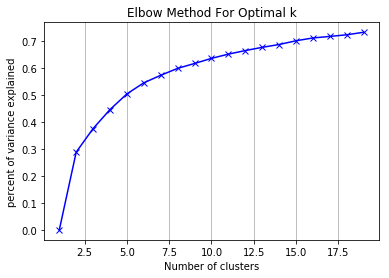

In [37]:


plt.plot(K, percent_of_explained, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('percent of variance explained')
plt.title('Elbow Method For Optimal k')
plt.grid(axis = 'x')
plt.show()

In [16]:
percent_of_explained[9]

0.636319274968889

In [17]:
percent_of_explained[17]

0.7256828837987456

In [18]:
 # set number of clusters
kclusters = 5

singapore_grouped_clustering = df00

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 1, 3, 3, 1, 1, 1], dtype=int32)

In [19]:
df00['cluster_lable'] = kmeans.labels_

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df000 = pd.concat([df00,df01],axis = 1)

In [21]:
df000.head()

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
0,2009,199.468223,1.0,1005.1875,220.887653,2301.414936,0,1A,CANTONMENT RD,1.277830,103.840953
1,2014,628.886166,2.0,1075.0,426.195557,1145.402321,2,10A,BOON TIONG RD,1.286793,103.833135
2,1977,1031.568882,1.0,287.625,1048.577178,919.340838,1,36,MARSILING DR,1.442024,103.775188
3,1980,1031.568882,1.0,289.2,1048.577178,919.340838,1,201,MARSILING DR,1.442024,103.775188
4,1989,951.765621,5.0,290.25,1283.229845,879.546854,1,812,JURONG WEST ST 81,1.346300,103.695902


In [22]:
df000.to_csv('hdb_after_cluster_k5.csv',index = False)

In [44]:
import pandas as pd
df1 = pd.read_csv('hdb_after_cluster.csv')

In [47]:
df00 = df1[df1['cluster_lable'] == 0]

In [48]:
df00.head()

,Unnamed: 0,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
37,37,1999,425.163043,4.0,312.500000,493.063440,1062.956795,0,667,CHOA CHU KANG CRES,1.399745,103.750766
44,44,1997,425.163043,4.0,314.166667,493.063440,1062.956795,0,669,CHOA CHU KANG CRES,1.399745,103.750766
46,46,2000,425.163043,4.0,314.350000,493.063440,1062.956795,0,683A,CHOA CHU KANG CRES,1.399745,103.750766
48,48,1983,243.840633,3.0,316.000000,348.205132,988.580705,0,1,TECK WHYE AVE,1.379293,103.756167
51,51,1978,301.526991,3.0,316.500000,290.952001,1036.977175,0,12,TECK WHYE LANE,1.379456,103.755675


In [24]:
df000 = df1.loc[0:1200]

In [59]:
import numpy as np

In [27]:
 # set number of clusters
kclusters = 5

<h3>4.2 clustering -hierarchy class</h3>

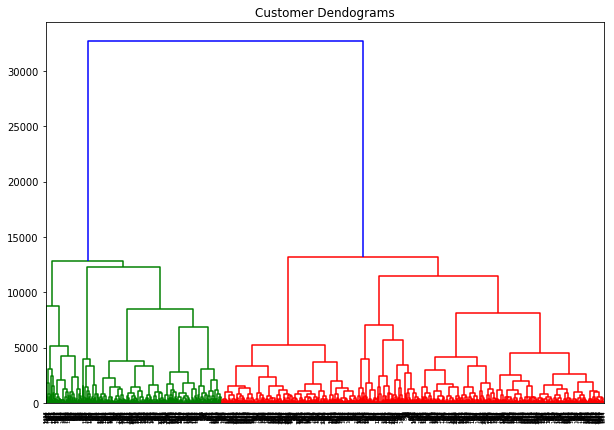

In [61]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df00, method='ward')) 

In [48]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df00)  

array([10,  5,  0, ...,  8,  2,  5])

In [63]:
df00['cluster_lable'] = cluster.labels_

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
# find the best k
from sklearn.preprocessing import MinMaxScaler

In [51]:
#To give equal importance to all features, we need to scale the continuous features.
mms = MinMaxScaler()
mms.fit(df00)
data_transformed = mms.transform(df00)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [52]:
cluster = cluster.fit(data_transformed)

In [53]:
kk = cluster.inertia_

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

In [ ]:
percent_of_explained = (Sum_of_squared_distances[0] - Sum_of_squared_distances)/Sum_of_squared_distances[0]

In [ ]:
#initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [65]:
df000 = pd.concat([df00,df01],axis = 1)

In [66]:
df000.to_csv('hdb_after_cluster_k11_hie.csv',index = False)

In [1]:
import pandas as pd
df1 = pd.read_csv('hdb_after_cluster_k11_hie.csv')

In [2]:
import numpy as np

In [4]:
 # set number of clusters
kclusters = 11

In [5]:
df000 = df1.loc[0:1200]

<h2>5 Filter system(results) </h2>

<p>we depict an example of searching results bellow</p>

In [32]:
import pandas as pd
df = pd.read_csv('hdb_after_cluster_k11_hie.csv')
df0000 =pd.read_csv('hdb-property-information.csv')

In [33]:
df.head()

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
0,2009,199.468223,1.0,1005.1875,220.887653,2301.414936,10,1A,CANTONMENT RD,1.277830,103.840953
1,2014,628.886166,2.0,1075.0000,426.195557,1145.402321,5,10A,BOON TIONG RD,1.286793,103.833135
2,1977,1031.568882,1.0,287.6250,1048.577178,919.340838,0,36,MARSILING DR,1.442024,103.775188
3,1980,1031.568882,1.0,289.2000,1048.577178,919.340838,0,201,MARSILING DR,1.442024,103.775188
4,1989,951.765621,5.0,290.2500,1283.229845,879.546854,0,812,JURONG WEST ST 81,1.346300,103.695902


In [34]:
# filter example
df = df[(df['dis_MRT']<=350)&(df['prim_no']>=3)&(df['year_completed']>=2000)&(df['dis_fairprice']<500)]

In [35]:
df.head(1)

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
292,2000,194.583621,4.0,361.625,292.548722,3411.690167,9,351B,CANBERRA RD,1.450891,103.819987


In [36]:
print('There are ' + str(df.shape[0]) + ' block groups meet your need')

There are 75 block groups meet your need


In [37]:
# check out similar blocks within the same group
i = 292
df0000[(df0000['year_completed'] == df.loc[i,"year_completed"])&(df0000['street'] == df.loc[i,'street'])&(df0000['residential'] == 'Y')]

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
5550,351B,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,27,53,0,0,0,0,0,0,0
5552,351C,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,26,52,0,0,0,0,0,0,0
5554,351D,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,0,0,78,0,0,0,0,0,0
5567,352A,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,27,53,0,0,0,0,0,0,0
5568,352B,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,27,53,0,0,0,0,0,0,0
5569,352C,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,26,65,0,0,0,0,0,0,0


<h2> The end (no more python codes for other parts of report)</h2>

<h2>5. Conclusion and expansion</h2>
<p>So far, what I did in this report is just a first step in building a complete recommendation system. Clustering those HDB blocks helps potential property demanders to have a basic review of local HDB market. But individuals’ demand differs from person to person. A customized filter system is also needed to target the perfect HDB.  Therefore, my plan is to create an app (by using python GUI package PyQT) with the clustering results we already got, and the existed data is also needed to create the filter interface. In apple store, there is currently no such an app to give Singapore residents guidelines like this. 
Besides HDB data, I also consider in the future build a whole property system by adding condo data, even though it only owns 20% of the market share. Because those condos are, in some cases, substitutions of HDB blocks that build in after year 2000 (both in better living condition and higher rentals than the average HDB). 
</p>